<a href="https://colab.research.google.com/github/DiproHaque/Project-DIY--/blob/main/synthetic_dataset_for_DiH_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

np.random.seed(42)

N = 250  # change to 200–300 if needed

def random_timestamp():
    start = datetime(2025, 12, 1)
    end = datetime(2025, 12, 15)
    delta = end - start
    return start + timedelta(seconds=random.randint(0, int(delta.total_seconds())))

data = []

for _ in range(N):

    timestamp = random_timestamp().strftime("%m/%d/%Y %H:%M:%S")

    gender = random.choice(["Male", "Female", "Other"])
    age = random.choice(["18-24", "25-34", "35-44", "45-54", "55+"])
    area = random.choice(["Urban", "Rural", "Semi-urban"])
    disaster = random.choice(["Flood", "Cyclone", "Earthquake", "Drought", "Landslide"])

    displacement = random.choices(
        ["Not displaced", "Displaced for less than 6 months", "Displaced for more than 6 months"],
        weights=[0.45, 0.25, 0.30]
    )[0]

    stay = random.choice([
        "Own home", "Rented home", "Relative’s home",
        "Temporary shelter or camp", "Others home"
    ])

    income_loss = random.choices(
        ["No reduction", "Less than 25%", "26–50%", "51–75%", "More than 75%"],
        weights=[0.15, 0.20, 0.25, 0.20, 0.20]
    )[0]

    basic_needs = random.choices(
        ["Not difficult", "Slightly difficult", "Moderately difficult", "Very difficult"],
        weights=[0.15, 0.30, 0.30, 0.25]
    )[0]

    stress = random.choices(
        ["None", "Mild", "Moderate", "Severe"],
        weights=[0.10, 0.30, 0.35, 0.25]
    )[0]

    symptoms = random.choice([
        "Anxiety",
        "Anger or irritability",
        "Sleep disturbance",
        "Trauma-related symptoms (e.g., intrusive memories)",
        "Anxiety, Sleep disturbance",
        "Anxiety, Anger or irritability",
        "Sleep disturbance, Trauma-related symptoms (e.g., intrusive memories)"
    ])

    conflict_change = random.choices(
        ["Decreased", "No change", "Slightly increased", "Significantly increased"],
        weights=[0.10, 0.30, 0.35, 0.25]
    )[0]

    # IPV outcome logic
    if stress in ["Moderate", "Severe"] and conflict_change != "No change":
        ipv = random.choices(
            ["Verbal or emotional abuse",
             "Sexual coercion or pressure",
             "Increased controlling behavior",
             "Verbal or emotional abuse, Increased controlling behavior"],
            weights=[0.4, 0.2, 0.2, 0.2]
        )[0]
    else:
        ipv = random.choices(
            ["None of the above",
             "Verbal or emotional abuse"],
            weights=[0.7, 0.3]
        )[0]

    contribution = random.choice([
        "Not at all", "Slightly", "Moderately", "Very strongly"
    ])

    support = random.choice([
        "Not accessible at all",
        "Limited",
        "Somewhat accessible",
        "Very accessible"
    ])

    norms = random.choice([
        "Strongly disagree",
        "Disagree",
        "Neutral",
        "Agree",
        "Strongly agree"
    ])

    data.append([
        timestamp, gender, age, area, disaster,
        displacement, stay, income_loss,
        basic_needs, stress, symptoms,
        conflict_change, ipv,
        contribution, support, norms
    ])

columns = [
    "Timestamp",
    "Q1. What is your gender?",
    "Q2. What is your age group?",
    "Q3. Which type of area were you living in during the disaster?",
    "Q4.  What type of natural disaster did you experience most recently?",
    "Q5. Were you displaced from your home due to this disaster?",
    "Q6. Following the disaster, where did you primarily stay?",
    "Q7. To what extent did the disaster reduce your household income?",
    "Q8. After the disaster, how difficult was it to meet basic household needs (food, shelter, healthcare)?",
    "Q9. After the disaster, did you experience increased psychological stress or emotional distress?",
    "Q10. Which of the following did you experience after the disaster? (Select all that apply)",
    "Q11. Compared to before the disaster, how did conflict within your household change?",
    "After the disaster, did you experience or witness any of the following within an intimate relationship? (Select all that apply)",
    "Q13. In your view, how strongly did disaster-related stress (economic loss, displacement, uncertainty) contribute to household violence or conflict?",
    "Q14. After the disaster, how accessible were community or institutional support systems (local authorities, NGOs, community leaders) when household problems arose?",
    "Q15. To what extent do you agree with the following statement: Cultural or social norms in my community discourage reporting domestic violence, even after disasters."
]

df = pd.DataFrame(data, columns=columns)
df.head()


,Timestamp,Q1. What is your gender?,Q2. What is your age group?,Q3. Which type of area were you living in during the disaster?,Q4. What type of natural disaster did you experience most recently?,Q5. Were you displaced from your home due to this disaster?,"Q6. Following the disaster, where did you primarily stay?",Q7. To what extent did the disaster reduce your household income?,"Q8. After the disaster, how difficult was it to meet basic household needs (food, shelter, healthcare)?","Q9. After the disaster, did you experience increased psychological stress or emotional distress?",Q10. Which of the following did you experience after the disaster? (Select all that apply),"Q11. Compared to before the disaster, how did conflict within your household change?","After the disaster, did you experience or witness any of the following within an intimate relationship? (Select all that apply)","Q13. In your view, how strongly did disaster-related stress (economic loss, displacement, uncertainty) contribute to household violence or conflict?","Q14. After the disaster, how accessible were community or institutional support systems (local authorities, NGOs, community leaders) when household problems arose?","Q15. To what extent do you agree with the following statement: Cultural or social norms in my community discourage reporting domestic violence, even after disasters."
0,12/06/2025 06:45:27,Male,18-24,Rural,Cyclone,Displaced for more than 6 months,Temporary shelter or camp,More than 75%,Slightly difficult,Moderate,Sleep disturbance,Significantly increased,Sexual coercion or pressure,Slightly,Limited,Disagree
1,12/09/2025 21:59:05,Other,45-54,Rural,Earthquake,Displaced for more than 6 months,Own home,26–50%,Moderately difficult,Moderate,"Sleep disturbance, Trauma-related symptoms (e....",Significantly increased,"Verbal or emotional abuse, Increased controlli...",Moderately,Not accessible at all,Strongly agree
2,12/09/2025 11:18:22,Male,55+,Semi-urban,Drought,Displaced for less than 6 months,Temporary shelter or camp,26–50%,Moderately difficult,Mild,"Sleep disturbance, Trauma-related symptoms (e....",Significantly increased,None of the above,Slightly,Very accessible,Disagree
3,12/12/2025 21:20:30,Male,55+,Rural,Cyclone,Displaced for more than 6 months,Others home,Less than 25%,Not difficult,Mild,"Anxiety, Anger or irritability",No change,Verbal or emotional abuse,Slightly,Very accessible,Strongly agree
4,12/14/2025 23:54:06,Female,35-44,Rural,Cyclone,Displaced for more than 6 months,Rented home,26–50%,Very difficult,Mild,"Anxiety, Anger or irritability",Slightly increased,None of the above,Not at all,Not accessible at all,Strongly disagree


In [3]:
df.to_csv("synthetic_disaster_ipv_questionnaire_data.csv", index=False)


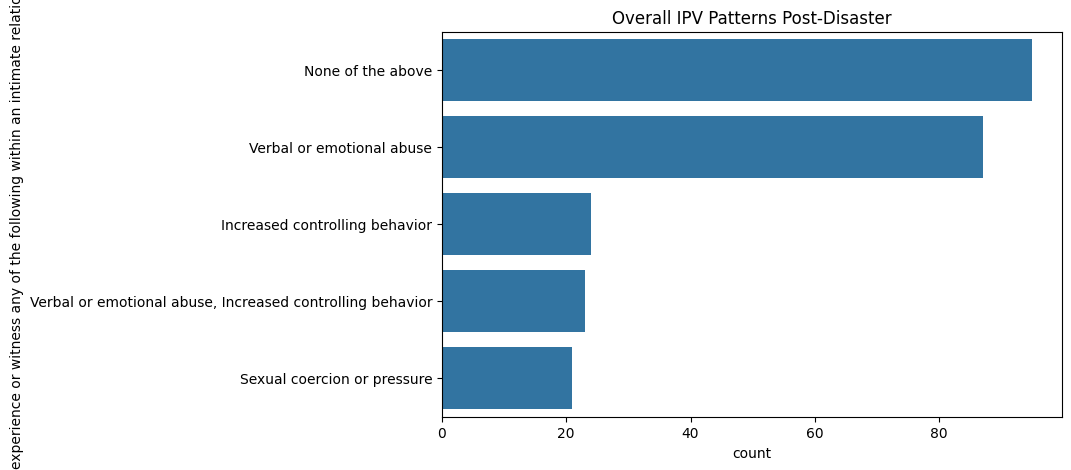

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(y='After the disaster, did you experience or witness any of the following within an intimate relationship? (Select all that apply)', data=df, order=df['After the disaster, did you experience or witness any of the following within an intimate relationship? (Select all that apply)'].value_counts().index)
plt.title('Overall IPV Patterns Post-Disaster')
plt.show()


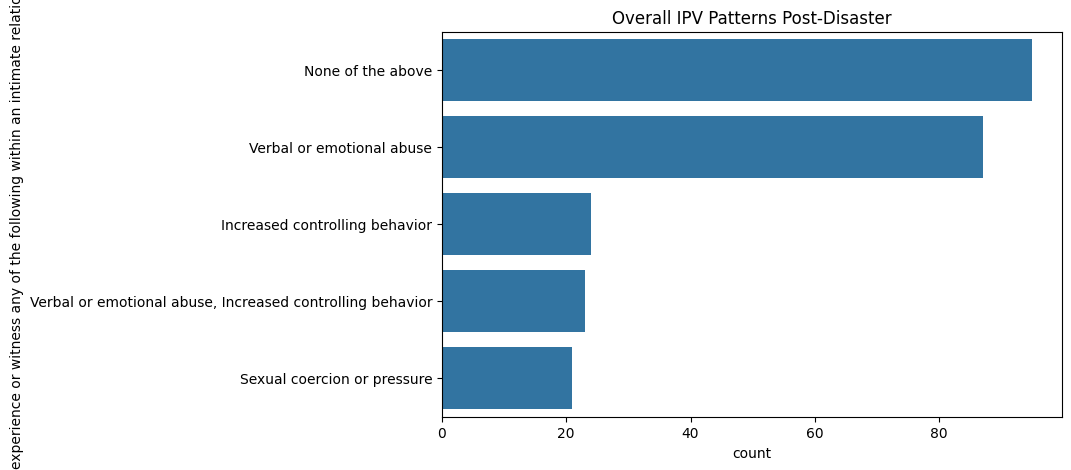

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(y='After the disaster, did you experience or witness any of the following within an intimate relationship? (Select all that apply)', data=df, order=df['After the disaster, did you experience or witness any of the following within an intimate relationship? (Select all that apply)'].value_counts().index)
plt.title('Overall IPV Patterns Post-Disaster')
plt.show()

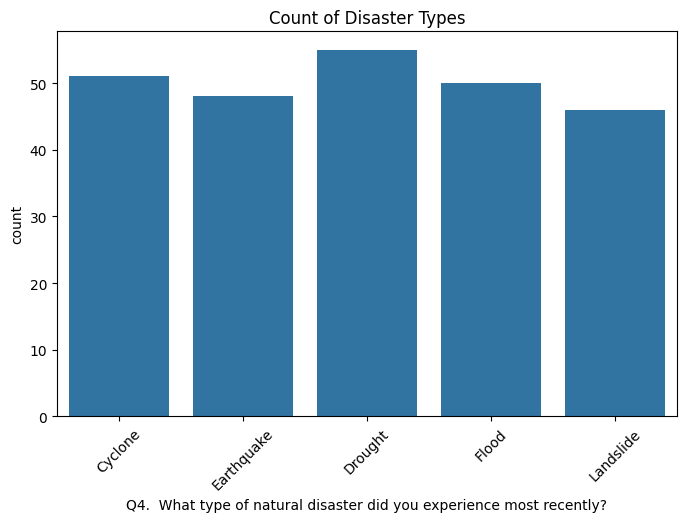

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Disaster type distribution
plt.figure(figsize=(8,5))
sns.countplot(x="Q4.  What type of natural disaster did you experience most recently?", data=df)
plt.xticks(rotation=45)
plt.title("Count of Disaster Types")
plt.show()


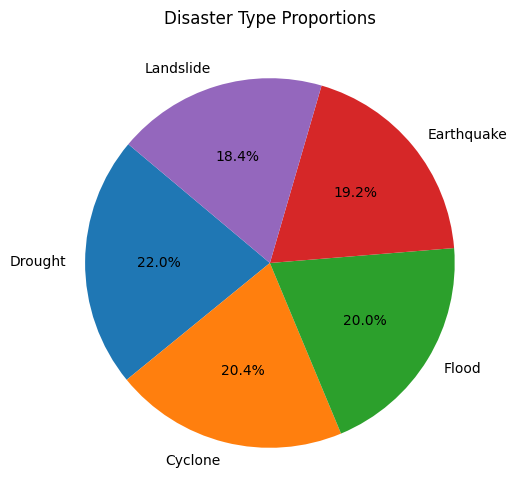

In [7]:
disaster_counts = df["Q4.  What type of natural disaster did you experience most recently?"].value_counts()
plt.figure(figsize=(6,6))
disaster_counts.plot.pie(autopct="%1.1f%%", startangle=140)
plt.title("Disaster Type Proportions")
plt.ylabel("")
plt.show()


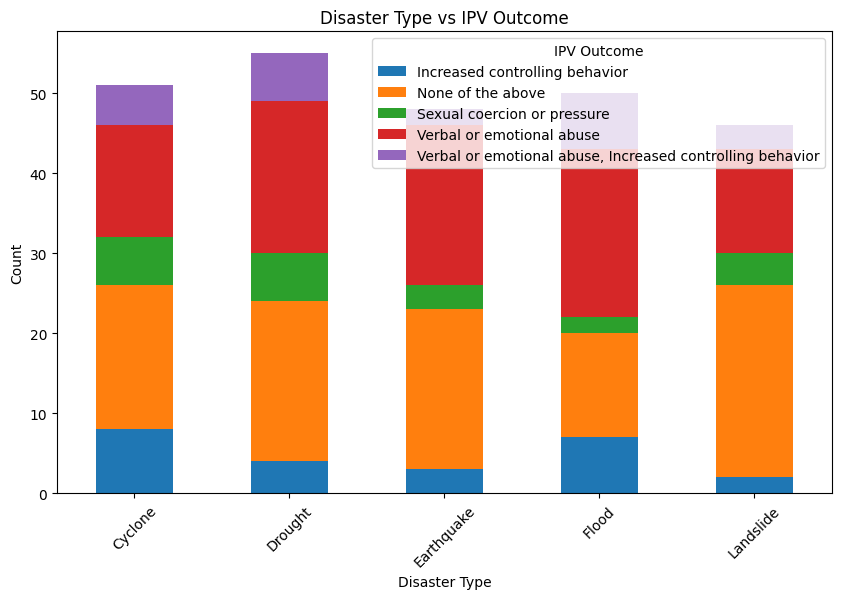

In [8]:
cross = pd.crosstab(df["Q4.  What type of natural disaster did you experience most recently?"], df["After the disaster, did you experience or witness any of the following within an intimate relationship? (Select all that apply)"])
cross.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Disaster Type vs IPV Outcome")
plt.xlabel("Disaster Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="IPV Outcome")
plt.show()


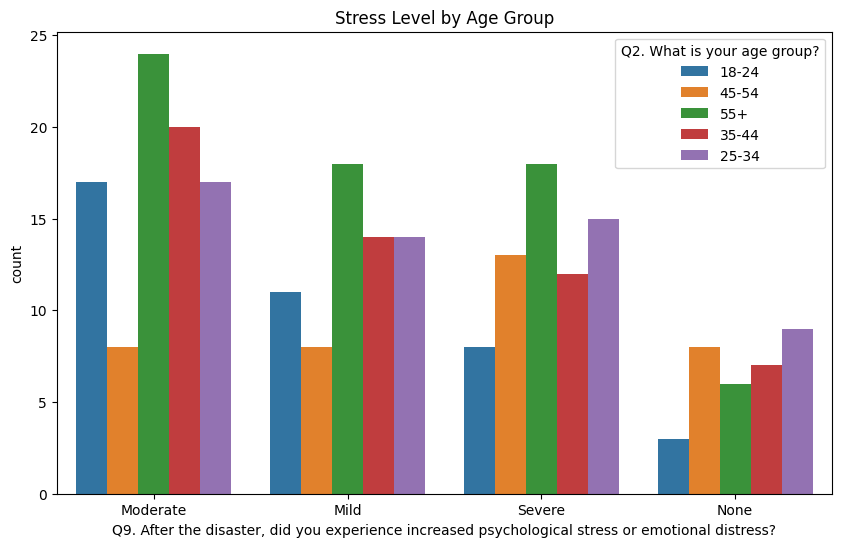

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x="Q9. After the disaster, did you experience increased psychological stress or emotional distress?", hue="Q2. What is your age group?", data=df)
plt.title("Stress Level by Age Group")
plt.show()


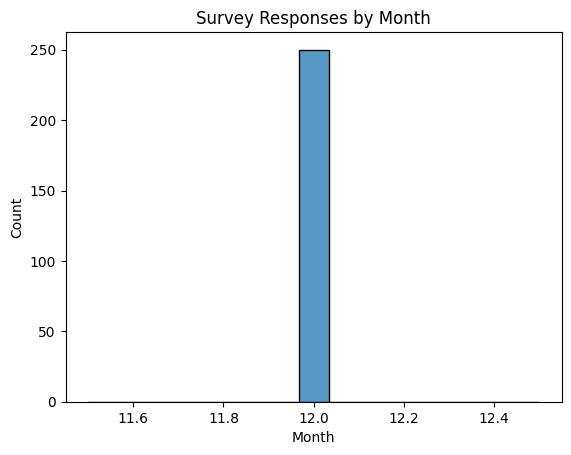

In [11]:
df["Date"] = pd.to_datetime(df["Timestamp"])
df["Month"] = df["Date"].dt.month
sns.histplot(df["Month"], bins=15)
plt.title("Survey Responses by Month")
plt.xlabel("Month")
plt.show()


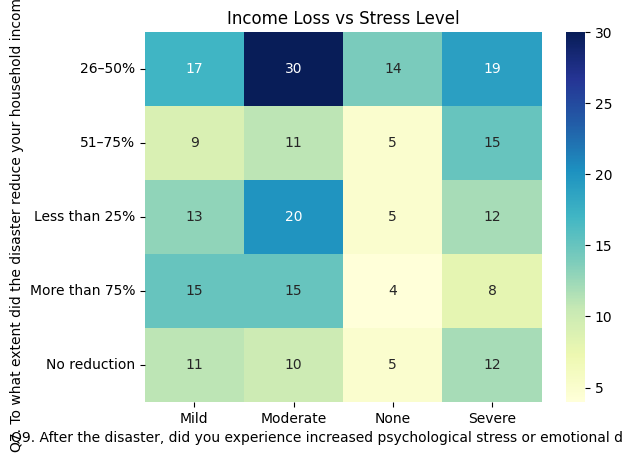

In [12]:
import numpy as np

cross = pd.crosstab(df["Q7. To what extent did the disaster reduce your household income?"], df["Q9. After the disaster, did you experience increased psychological stress or emotional distress?"])
sns.heatmap(cross, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Income Loss vs Stress Level")
plt.show()


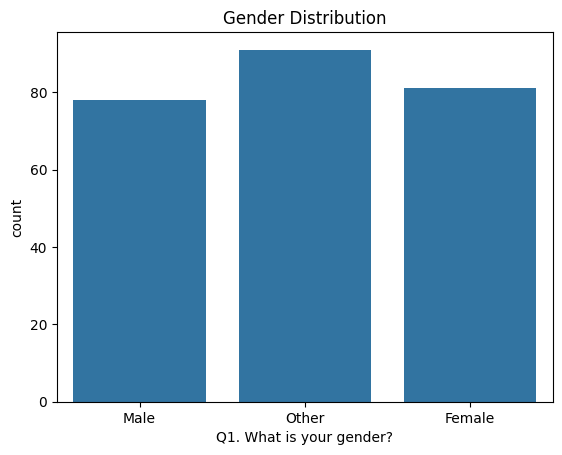

In [13]:
sns.countplot(x="Q1. What is your gender?", data=df)
plt.title("Gender Distribution")
plt.show()

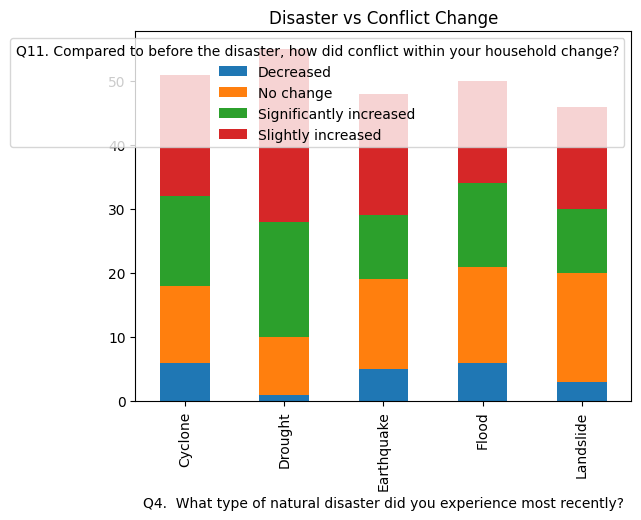

In [14]:
cross = pd.crosstab(df["Q4.  What type of natural disaster did you experience most recently?"], df["Q11. Compared to before the disaster, how did conflict within your household change?"])
cross.plot(kind="bar", stacked=True)
plt.title("Disaster vs Conflict Change")
plt.show()


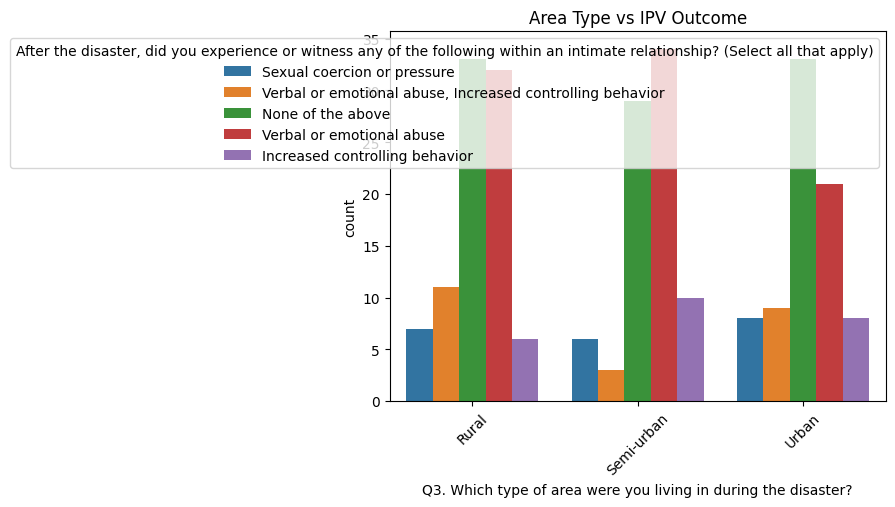

In [15]:
sns.countplot(x="Q3. Which type of area were you living in during the disaster?", hue="After the disaster, did you experience or witness any of the following within an intimate relationship? (Select all that apply)", data=df)
plt.title("Area Type vs IPV Outcome")
plt.xticks(rotation=45)
plt.show()
